In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import control
from ipywidgets import interact

ts = np.linspace(0, 10, 1000)

def pzmap_k(kc):
    plt.rcParams['figure.figsize'] = 10,4

    print(kc)
    ax_pzmap = plt.subplot2grid((1, 2), (0, 0))
    ax_resp = plt.subplot2grid((1, 2), (0, 1))

    gLC = control.feedback(kc*Gp,1)
    _, yLC = control.step_response(gLC, ts)

    pLC = gLC.pole()
    cLC = gLC.zero()
    
    
    ax_pzmap.plot(pLA.real, pLA.imag, 'rx',
                  cLA.real, cLA.imag, 'ro',
                  pLC.real, pLC.imag, 'bx',
                  cLC.real, cLC.imag, 'bo')
    ax_pzmap.legend(('p LA', 'c LA', 'p LC','c LC'))
    ax_pzmap.axis(visualizacion_s)
    ax_pzmap.grid()
    ax_resp.plot(ts,yLA,'r',ts,yLC,'b')
    ax_resp.axis(visualizacion_t)
    ax_resp.grid()


def rlocus_int(kc):
    print(kc)
    plt.rcParams['figure.figsize'] = 10,4
    ax_pzmap = plt.subplot2grid((1, 2), (0, 0))
    ax_resp = plt.subplot2grid((1, 2), (0, 1))
    _, y = control.step_response(Gp, ts)

    gLC = control.feedback(kc*Gp,1)
    _, yLC = control.step_response(gLC, ts)

    rlist,klist = control.root_locus(Gp,plot = False);
    
    pLC = gLC.pole()
    cLC = gLC.zero()
    
    
    ax_pzmap.plot(pLA.real, pLA.imag, 'rx',
                  cLA.real, cLA.imag, 'ro',
                  pLC.real, pLC.imag, 'bx',
                  cLC.real, cLC.imag, 'bo',
                  rlist.real, rlist.imag, '-k')
    ax_pzmap.legend(('p LA', 'c LA', 'p LC','c LC','LGDR'))
    ax_pzmap.axis(visualizacion_s)
    ax_pzmap.grid()
    ax_resp.plot(ts,yLA,'r',ts,yLC,'b')
    ax_resp.axis(visualizacion_t)
    ax_resp.grid()


# Lugar Geométrico de las Raíces



Dado el bucle de control y cosideraciones en los sistemas que lo componen, la función de transferencia de un proceso controlado es:

\begin{equation}
\frac{C(s)}{R(s)} = \frac{G_c(s)G_p(s)}{1 + G_c(s)G_p(s)H(s)}
\end{equation}

Para efectos prácticos considere que $H(s)=1$. Si además se tiene en cuenta que los sistemas son LTI, puede considerarse que sus modelos corresponden a una fracción de polinomios.

$$G_c(s)= \frac{N_c(s)}{D_c(s)}$$
$$G_p(s)= \frac{N_p(s)}{D_p(s)}$$

Y la función de transferencia de lazo cerrado queda:

$$\frac{C(s)}{R(s)} = \frac{\frac{N_c(s)N_p(s)}{D_c(s)D_p(s)}}{\frac{D_c(s)D_p(s) + N_c(s)N_p(s)}{D_c(s)D_p(s)}} = \frac{N_c(s)N_p(s)}{D_c(s)D_p(s) + N_c(s)N_p(s)}$$


Cuando se considera que $G_c(s)=k_c$, la función de transferencia de lazo cerrado se reduce a:

\begin{equation}
\frac{C(s)}{R(s)} = \frac{k_c G_p(s)}{1 + k_c G_p(s)}
\end{equation}

o

$$\frac{C(s)}{R(s)} = \frac{k_cN_p(s)}{D_p(s) + k_cN_p(s)}$$


Observe que:
- Los polos del sistema en lazo cerrado dependen de qué valor tome $k_c$.
- Los ceros del sistema en lazo cerrado son los mismos que en lazo abierto al menos si $k_c   \neq 0$.




**¿Cómo varía la ubicación de los polos en función de $k_c$?**


**Ejemplo**

Suponga un proceso modelado por:

$$G_p(s) = \frac{1}{s - 1}$$

y una estrategia de contro definida por:

$$G_c(s) = k_c$$


In [2]:
# Se define la función de transferencia del proceso
Gp = control.tf(1, [1,-1])
Gp

TransferFunction(array([1]), array([ 1, -1]))

Varíe $k_c$ y observe cómo varía la posición de los polos del sistema.

In [3]:
visualizacion_s = [-10, 10, -5, 5]
visualizacion_t = [0, 10, -2, 2]

pLA = Gp.pole()
cLA = Gp.zero()
_, yLA = control.step_response(Gp, ts)

interact(pzmap_k, 
         kc=(-10., 10.))

interactive(children=(FloatSlider(value=0.0, description='kc', max=10.0, min=-10.0), Output()), _dom_classes=(…

<function __main__.pzmap_k(kc)>

¿Qué pasa con un sistema de segundo orden?

In [4]:
# Se define la función de transferencia del proceso
Gp = control.tf(2, [1,4,1])
Gp


TransferFunction(array([2]), array([1, 4, 1]))

In [5]:
visualizacion_s = [-10, 10, -5, 5]
visualizacion_t = [0, 10, -2, 2]

pLA = Gp.pole()
cLA = Gp.zero()
_, yLA = control.step_response(Gp, ts)

interact(pzmap_k, 
         kc=(0., 10.))

interactive(children=(FloatSlider(value=5.0, description='kc', max=10.0), Output()), _dom_classes=('widget-int…

<function __main__.pzmap_k(kc)>

Observe que en ambos casos, al variar el parámetro $k_c>0$,los polos del sistema en lazo cerrado describen trayectorias contiguas en el plano complejo $s$. A estas trayectorias se les conoce como [**Lugar Geométrico de las Raíces**](https://en.wikipedia.org/wiki/Root_locus).

En este caso se ha variado el valor $k_c$, sin embargo es posible generar lugares variando un parámetro diferente dentro de $G_c(s)$ o $H(s)$.

Hay técnicas numéricas para dibujar una aproximación del Lugar Geométrico de las Raíces, sin embargo, se usarán técnicas computacionales.

**Ejemplo**

Considere un sistema de orden 3.

$$G_p(s) = \frac{2}{s \left ( s^2 + 3s + 2\right ) }$$

Construya el Lugar de las raíces.

In [6]:
# Se define la función de transferencia del proceso
Gp = control.tf(2, [1,3,2,0])
Gp

TransferFunction(array([2]), array([1, 3, 2, 0]))

2


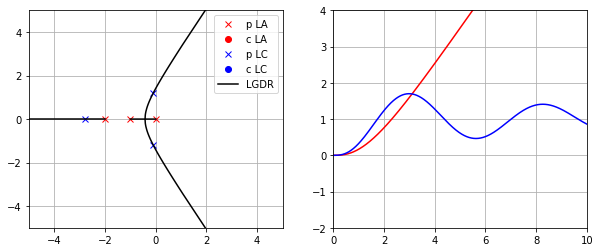

In [7]:
visualizacion_s = [-5, 5, -5, 5]
visualizacion_t = [0, 10, -2, 4]

pLA = Gp.pole()
cLA = Gp.zero()
_, yLA = control.step_response(Gp, ts)

rlocus_int(2)

In [8]:
visualizacion_s = [-5, 5, -5, 5]
visualizacion_t = [0, 10, -2, 4]

pLA = Gp.pole()
cLA = Gp.zero()
_, yLA = control.step_response(Gp, ts)

interact(rlocus_int, 
         kc=(0., 5.))

interactive(children=(FloatSlider(value=2.5, description='kc', max=5.0), Output()), _dom_classes=('widget-inte…

<function __main__.rlocus_int(kc)>

Observe:
- Este sistema es inestable en lazo abierto.
- Al cerrar el lazo, el sistema se estabiliza pero si la ganancia sobrepasa un valor, se vuelve inestable nuevamente.

Retomando la expresión

$$\frac{C(s)}{R(s)} = \frac{k_cN_p(s)}{D_p(s) + k_cN_p(s)}$$

Se llama ecuación característica a $D_p(s) + k_cN_p(s) = 0$. Esta permite definir la ubicación de los polos de lazo cerrado. 

**Preguntas**

- ¿Hacia dónde se mueven los polos de lazo cerrado cuando $k_c \rightarrow \infty$?
- ¿Puede encontrar los rangos de $k_c$ que hacen estable al sistema?

Repita los análisis realizados con:

$$G_p(s) = \frac{s+3}{\left (s+2 \right )\left (s+1 \right )} $$